In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import (train_test_split, GridSearchCV)
from sklearn.metrics import  accuracy_score, confusion_matrix, precision_score, recall_score, make_scorer, f1_score, classification_report
from sklearn.svm import SVC

In [27]:
final_dataset = pd.read_csv('cleaned_data.csv')
final_dataset.head(10)

,age,cigsPerDay,BPMeds,prevalentStroke,diabetes,totChol,sysBP,BMI,heartRate,glucose,male,female,target
0,-1.217670,-0.764079,-0.162324,-0.072187,-0.099863,-0.961950,-1.240737,0.361500,0.391573,-0.186806,-1.145519,1.145519,0
1,-0.397103,-0.764079,-0.162324,-0.072187,-0.099863,0.334890,-0.496956,0.831947,1.685033,-0.272141,0.872966,-0.872966,0
2,-0.162655,0.915464,-0.162324,-0.072187,-0.099863,0.216995,-0.174651,-0.074199,-0.039581,-0.784149,-1.145519,1.145519,0
3,1.361256,1.755235,-0.162324,-0.072187,-0.099863,-0.254583,0.941021,0.791852,-0.901888,2.031895,0.872966,-0.872966,1
4,-0.397103,1.167395,-0.162324,-0.072187,-0.099863,1.160152,-0.050687,-0.672951,0.822726,0.495871,0.872966,-0.872966,0
5,-0.748775,-0.764079,-0.162324,-0.072187,-0.099863,-0.183846,2.428583,1.251608,0.132880,1.690557,0.872966,-0.872966,0
6,1.595704,-0.764079,-0.162324,-0.072187,-0.099863,-0.726161,0.345996,2.002720,-1.333041,0.495871,0.872966,-0.872966,1
7,-0.514327,0.915464,-0.162324,-0.072187,-0.099863,1.820361,-1.538249,-1.052516,0.305342,-0.101472,0.872966,-0.872966,0
8,0.306241,-0.764079,-0.162324,-0.072187,-0.099863,0.570679,0.519545,0.198447,0.046650,-0.016137,-1.145519,1.145519,0
9,-0.748775,1.755235,-0.162324,-0.072187,-0.099863,-0.254583,1.536046,-0.536628,1.512572,0.751875,-1.145519,1.145519,0


<br>

### Labeling the Dataset and doing Train, Test and Split

In [28]:
X = final_dataset.drop('target', axis=1).to_numpy()
y = final_dataset.target.to_numpy()

# Train Test and Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True, random_state=44)

In [29]:
clf = SVC(class_weight='balanced')
clf.fit(X_train, y_train)

SVC(class_weight='balanced')

In [30]:
y_predict = clf.predict(X_test)

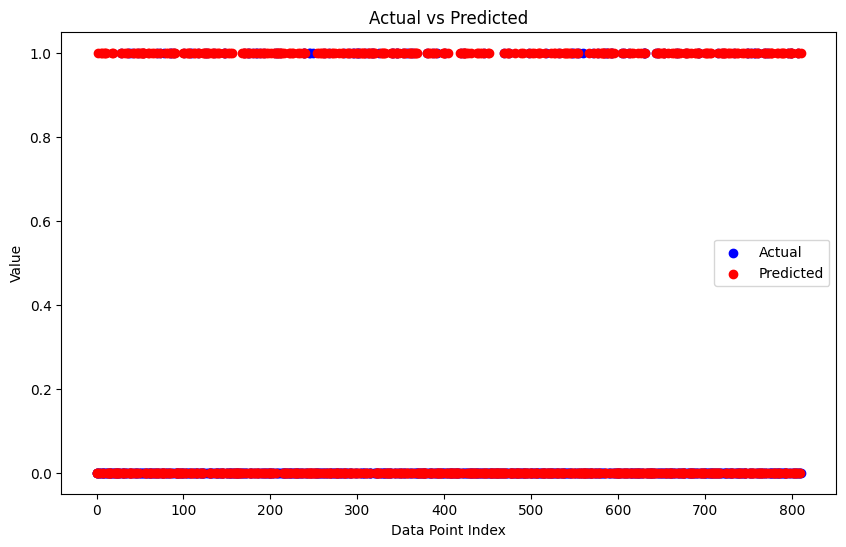

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_predict)), y_predict, color='red', label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Data Point Index')
plt.ylabel('Value')
plt.legend()
plt.show()

In [32]:
clf.score(X_train, y_train)

0.6756172839506173

In [33]:
clf.score(X_test, y_test)

0.6732429099876696

In [34]:
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)

0.6732429099876696


In [35]:
con_m = confusion_matrix(y_test, y_predict)

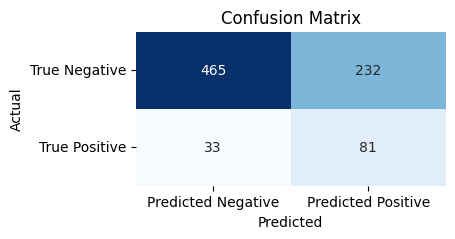

In [36]:
plt.figure(figsize=(4, 2))
sns.heatmap(con_m, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [37]:
precision = precision_score(y_test, y_predict)
print(f"Our model is {precision*100:.3f} % precised.")

Our model is 25.879 % precised.


In [38]:
recall= recall_score(y_test, y_predict)
print(f"{recall*100:.3f} %")

71.053 %


In [39]:
f1_score(y_test, y_predict)

0.3793911007025761

#### HyperParameter Tunning

In [40]:
param_grid = {
    'C': [0.1, 1, 10],           # Regularization parameter
    'kernel': ['poly', 'linear' ],          # Kernel type
    'degree': [2, 3, 4, 5],          # Polynomial degree
    'gamma': ['scale', 'auto'],  # Kernel coefficient
}

In [41]:
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.1, 1, 10], 'degree': [2, 3, 4, 5],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'linear']},
             scoring='accuracy')

In [42]:
best_params = grid_search.best_params_

In [43]:
clf.set_params(**best_params)

SVC(C=0.1, class_weight='balanced', degree=4, kernel='poly')

In [44]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91       697
           1       0.31      0.16      0.21       114

    accuracy                           0.83       811
   macro avg       0.59      0.55      0.56       811
weighted avg       0.79      0.83      0.81       811



In [46]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.3f}")

recall = recall_score(y_test, y_pred)
print(f"\nRecall: {recall*100:.3f}")

Accuracy: 83.107

Recall: 15.789


In [47]:
cm = confusion_matrix(y_test, y_pred)

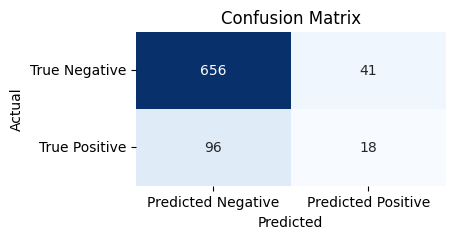

In [48]:
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [49]:
clf.score(X_train, y_train)

0.8524691358024692

In [50]:
clf.score(X_test, y_test)

0.8310727496917386